In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Data Analysis

## Load Training Data 

In [2]:
train_df = pd.read_csv('/Users/alexis/Cranfield/AI/assignment/data/train_full_dataset.csv')
print("Train data shape:", train_df.shape)
train_df.head()

Train data shape: (67914, 8)


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


## Distribution of the number of images per class

In [3]:
# Number of images per label
label_counts = train_df['class_id'].value_counts()
label_counts = label_counts.sort_index()
label_counts

class_id
0      7162
1       279
2       960
3      5427
4       556
5      1000
6      1247
7      2483
8      2580
9      2203
10     2476
11     4842
12      226
13     4655
14    31818
Name: count, dtype: int64

In [4]:
class_counts = train_df["class_id"].value_counts()

fig = px.bar(
    class_counts,
    x=class_counts.index,
    y=class_counts.values,
    log_y=True,
    color=class_counts.index

).update_layout(
    title="Number of annotations per class",
    xaxis_title="Class ID",
    yaxis_title="Number of observations",
).update_xaxes(categoryorder='total descending')
fig.show()

In [5]:
from collections import Counter

train_counter = Counter()
for class_id in train_df['class_id']:
    train_counter.update([class_id])

print("Number of classes:", len(train_counter))
print("Number of unique images:", train_df['image_id'].nunique())
print("Minimum number of images per class:", min(train_counter.values()))
print("Maximum number of images per class:", max(train_counter.values()))
print("Average number of images per class:", sum(train_counter.values()) / len(train_counter))

Number of classes: 15
Number of unique images: 15000
Minimum number of images per class: 226
Maximum number of images per class: 31818
Average number of images per class: 4527.6


## Zero-rule baseline (majority class classifier)

In [6]:
majority_class = train_counter.most_common(1)[0]
print("Majority class:", majority_class[0])

baseline_acc = majority_class[1] / sum(train_counter.values())
print("Accuracy when always predicting the majority class:")
print(f"{baseline_acc:.2f} ({baseline_acc*100:.2f}%)")

Majority class: 14
Accuracy when always predicting the majority class:
0.47 (46.85%)


## Number of bounding boxes per image

In [7]:
# Number of labels per image

image_label_counts = train_df['image_id'].value_counts()
image_label_counts = image_label_counts.sort_values(ascending=False)

print("Number of images with multiple labels:", (image_label_counts > 1).sum())
print("Maximum number of labels per image:", image_label_counts.max())
print("Average number of labels per image:", image_label_counts.mean())
print("Median number of labels per image:", image_label_counts.median())

Number of images with multiple labels: 15000
Maximum number of labels per image: 57
Average number of labels per image: 4.5276
Median number of labels per image: 3.0


## Radiologists

In [8]:
# Number of images labeled per radiologist

radiologist_counts = train_df['rad_id'].value_counts()
radiologist_counts = radiologist_counts.sort_values(ascending=False)
radiologist_counts

rad_id
R9     15708
R10    13292
R8     12198
R2      3121
R5      2783
R3      2285
R6      2041
R1      1995
R13     1824
R15     1823
R16     1763
R7      1733
R12     1729
R11     1670
R14     1624
R4      1513
R17      812
Name: count, dtype: int64

In [9]:
fig = px.bar(
    radiologist_counts,
    x=radiologist_counts.index,
    y=radiologist_counts.values,
    log_y=True,
    color=radiologist_counts.index,
).update_layout(
    title="Number of annotations per radiologist",
    xaxis_title="Radiologist ID",
    yaxis_title="Number of observations",
)
fig.show()

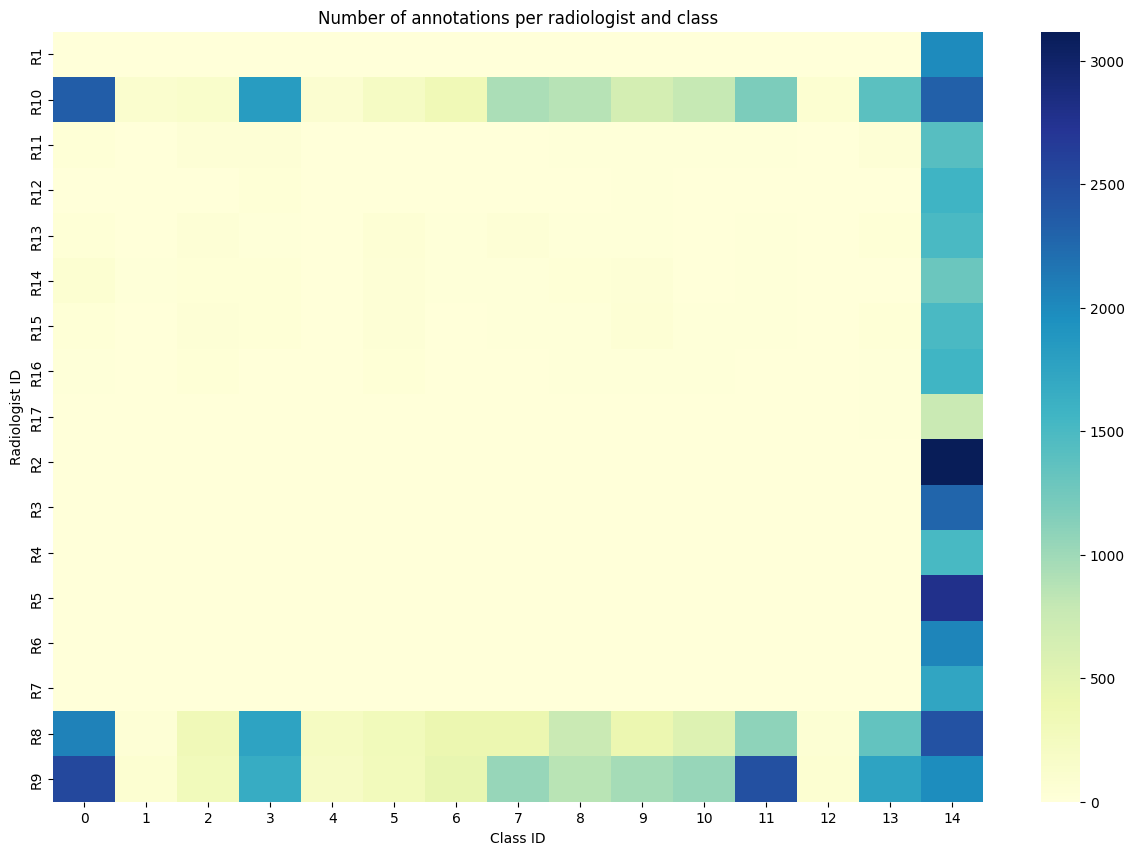

In [10]:
# DISTRIBUTION OF CLASS LABEL ANNOTATIONS BY RADIOLOGIST

radiologist_class_counts = train_df.groupby('rad_id')['class_id'].value_counts()

radiologist_class_counts = radiologist_class_counts.unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(radiologist_class_counts, ax=ax, cmap="YlGnBu")
ax.set_title("Number of annotations per radiologist and class")
ax.set_xlabel("Class ID")
ax.set_ylabel("Radiologist ID")
plt.show()